In [1]:
import json
import pandas
import order_independent_llm
import glob
import seaborn
import matplotlib.pyplot as plt

import order_independent_llm.plot_helpers

params=order_independent_llm.plot_helpers.nice_defaults()

In [2]:
targets = glob.glob("../results/csqa_split/*/*.jsonl")

In [3]:
df = pandas.concat([order_independent_llm.load_to_dataframe(t,fail_on_empty=True) for t in targets])

In [4]:
df_count = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).count().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_count

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,9741,9741,9741,9741,9741,9741,9741
gpt2,9741,9741,9741,9741,9741,9741,9741
lmsys/vicuna-7b-v1.5,9741,9741,9741,9741,9741,9741,9741
meta-llama/Llama-2-13b-chat-hf,9741,9741,9741,9741,9741,9741,9741
meta-llama/Llama-2-13b-hf,8000,8000,8000,8000,8000,8000,8000
meta-llama/Llama-2-70b-hf,500,500,500,500,500,500,500
meta-llama/Llama-2-7b-chat-hf,9741,9741,9741,9741,9741,9741,9741
meta-llama/Llama-2-7b-hf,9741,9741,9741,9741,9741,9741,9741
meta-llama/Meta-Llama-3-70B,500,500,500,500,500,500,500


In [5]:
df_acc = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_acc

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,0.265578,0.265681,0.265578,0.265681,0.265681,0.265578,0.265578
gpt2,0.199774,0.200595,0.197208,0.200185,0.198542,0.199774,0.197208
lmsys/vicuna-7b-v1.5,0.328406,0.338980,0.325121,0.316189,0.316292,0.294118,0.297300
meta-llama/Llama-2-13b-chat-hf,0.472025,0.416590,0.478082,0.422236,0.428395,0.394826,0.396366
meta-llama/Llama-2-13b-hf,0.307625,0.288500,0.306500,0.276375,0.277000,0.278500,0.278375
meta-llama/Llama-2-70b-hf,0.352000,0.348000,0.360000,0.328000,0.342000,0.378000,0.378000
meta-llama/Llama-2-7b-chat-hf,0.424186,0.367724,0.430757,0.365876,0.371420,0.363002,0.362796
meta-llama/Llama-2-7b-hf,0.232933,0.263423,0.235191,0.246895,0.240735,0.253670,0.257468
meta-llama/Meta-Llama-3-70B,0.330000,0.296000,0.362000,0.252000,0.256000,0.278000,0.282000


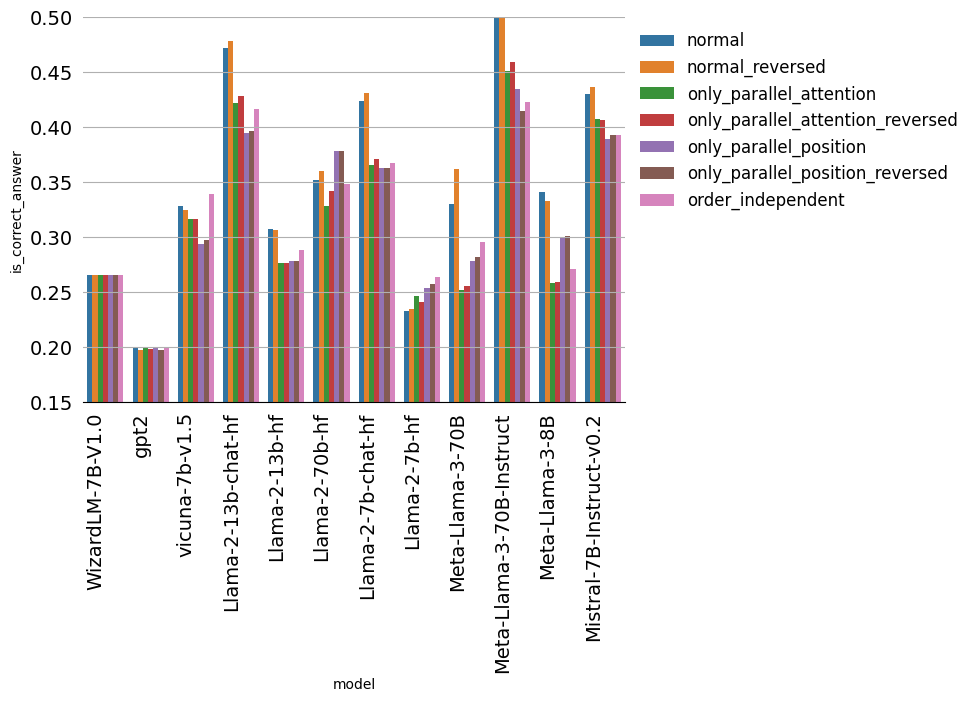

In [6]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax
)
ax.set_ylim([.15,.5])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
ax.legend(bbox_to_anchor=(1,1),loc = 'upper left')

In [8]:
df_piv = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,0.265578,0.265681,0.265578,0.265681,0.265681,0.265578,0.265578
gpt2,0.199774,0.200595,0.197208,0.200185,0.198542,0.199774,0.197208
lmsys/vicuna-7b-v1.5,0.328406,0.338980,0.325121,0.316189,0.316292,0.294118,0.297300
meta-llama/Llama-2-13b-chat-hf,0.472025,0.416590,0.478082,0.422236,0.428395,0.394826,0.396366
meta-llama/Llama-2-13b-hf,0.307625,0.288500,0.306500,0.276375,0.277000,0.278500,0.278375
meta-llama/Llama-2-70b-hf,0.352000,0.348000,0.360000,0.328000,0.342000,0.378000,0.378000
meta-llama/Llama-2-7b-chat-hf,0.424186,0.367724,0.430757,0.365876,0.371420,0.363002,0.362796
meta-llama/Llama-2-7b-hf,0.232933,0.263423,0.235191,0.246895,0.240735,0.253670,0.257468
meta-llama/Meta-Llama-3-70B,0.330000,0.296000,0.362000,0.252000,0.256000,0.278000,0.282000


In [9]:
df['model'].unique()

array(['lmsys/vicuna-7b-v1.5', 'meta-llama/Llama-2-7b-chat-hf',
       'meta-llama/Llama-2-7b-hf', 'meta-llama/Llama-2-13b-chat-hf',
       'meta-llama/Llama-2-70b-hf', 'meta-llama/Llama-2-13b-hf',
       'meta-llama/Meta-Llama-3-8B',
       'meta-llama/Meta-Llama-3-70B-Instruct',
       'meta-llama/Meta-Llama-3-70B',
       'mistralai/Mistral-7B-Instruct-v0.2', 'WizardLM/WizardLM-7B-V1.0',
       'gpt2'], dtype=object)

In [10]:
df_mean

NameError: name 'df_mean' is not defined

0.20059542141463915

In [11]:
plot_dat =[]


for model in df['model'].unique():
    df_conf = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count().reset_index().pivot(
        index = 'normal',
        columns='normal_reversed',
        values='order_independent'
    )
    df_mean = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count()
    df_mean = df_mean / df_mean.sum().sum()
    df_normed = df_conf /df_conf.sum().sum()
    print(model)
    print(df_conf.reset_index().to_markdown(index=False))
    print(df_normed.reset_index().to_markdown(index=False))
    plot_dat.append({
    'model':model,
    'acc' : float(df_mean.loc[(True,False)]) + float(df_mean.loc[(True,True)]),
    'error' :  float(df_mean.loc[(False,True)]),
    'oid' : False,
    #'oid' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean())
    })
    plot_dat.append({
    'model':model,
    'acc' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean()),
    'error' : 0,
    'oid' : True,
    #'oid' : 
    })

lmsys/vicuna-7b-v1.5
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    5055 |   1487 |
| True     |    1519 |   1680 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.518941 | 0.152654 |
| True     | 0.155939 | 0.172467 |
meta-llama/Llama-2-7b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    4003 |   1606 |
| True     |    1542 |   2590 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.410943 | 0.16487  |
| True     | 0.1583   | 0.265886 |
meta-llama/Llama-2-7b-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    6262 |   1210 |
| True     |    1188 |   1081 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.64285  | 0.124217 |
| True     | 0.121959 | 0.110974 |
meta-llama/Llama-2-13b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    3719 |   

In [59]:
df_plot = pandas.DataFrame(plot_dat)

In [52]:
df_plot['error']

0    0.308593
1    0.323170
2    0.246176
3    0.285333
4    0.234400
5    0.357733
6    0.295111
7    0.000533
8    0.072374
Name: error, dtype: float64

In [89]:
for p in ax.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.4, height=0.328406, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=0.424186, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=0.232933, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=0.4704, angle=0)
Rectangle(xy=(3.6, 0), width=0.4, height=0.3042, angle=0)
Rectangle(xy=(4.6, 0), width=0.4, height=0.344533, angle=0)
Rectangle(xy=(5.6, 0), width=0.4, height=0.444444, angle=0)
Rectangle(xy=(6.6, 0), width=0.4, height=0.264667, angle=0)
Rectangle(xy=(7.6, 0), width=0.4, height=0.199774, angle=0)
Rectangle(xy=(5.55112e-17, 0), width=0.4, height=0.33898, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=0.367724, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=0.263423, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=0.413733, angle=0)
Rectangle(xy=(4, 0), width=0.4, height=0.293, angle=0)
Rectangle(xy=(5, 0), width=0.4, height=0.2752, angle=0)
Rectangle(xy=(6, 0), width=0.4, height=0.389778, angle=0)
Rectangle(xy=(7, 0), width=0.4, height=0.2648, angle=

In [93]:
ax.get_legend_handles_labels()

([<matplotlib.patches.Rectangle at 0x323e4b0d0>,
 ['False', 'True'])

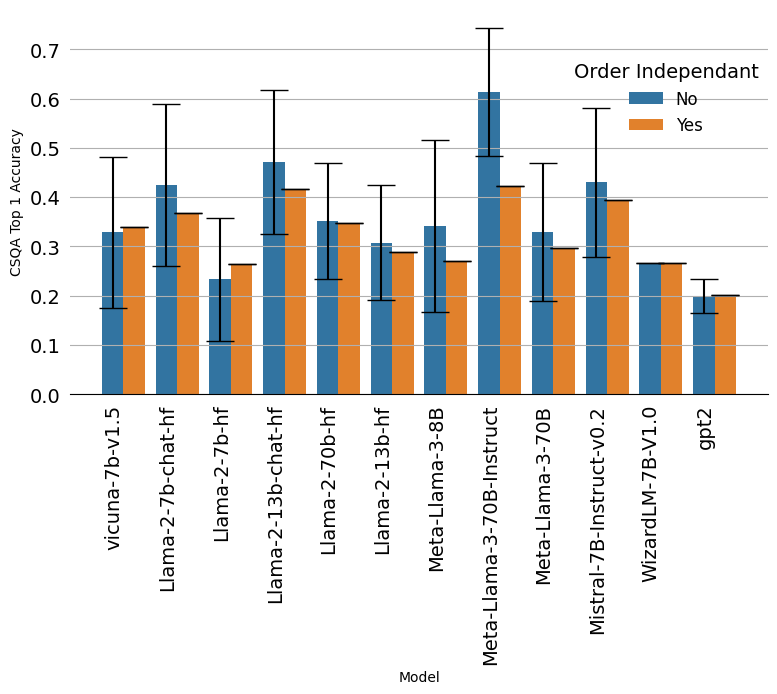

In [11]:
df_plot = pandas.DataFrame(plot_dat)
fig, ax = plt.subplots()
#ax = sns.barplot(x='Param', y='Value', data=df, hue='Name', palette='CMRmap_r')
seaborn.barplot(
    x = 'model',
    y = 'acc',
    data =df_plot,
    hue ='oid',
    #yerr = df_plot['error'],
    ax = ax
)

err_patches =  ax.patches[:12]
oid_patches =  ax.patches[12:-2]

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches][:-2]
y_coords = [p.get_height() for p in ax.patches][:-2]
ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in err_patches], y=[p.get_height() for p in err_patches], 
            yerr=df_plot[df_plot['oid'] == False]["error"], fmt="none", c="k")

ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in oid_patches], y=[p.get_height() for p in oid_patches], 
            yerr=df_plot[df_plot['oid'] == True]["error"], fmt="none", c="k")
#ax.set_ylim([.15,.5])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
patches, labels = ax.get_legend_handles_labels()
label_map = {
    'True' : "Yes",
    "False" : "No",
}
labels = [label_map[l] for l in labels]
ax.legend(patches, labels,bbox_to_anchor=(.7,.9),loc = 'upper left', title='Order Independant')
ax.set_xlabel("Model")
ax.set_ylabel("CSQA Top 1 Accuracy")
order_independent_llm.plot_helpers.multi_savefig("CSQA-ACC-errors")

ValueError: 'yerr' (shape: (9,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1,))

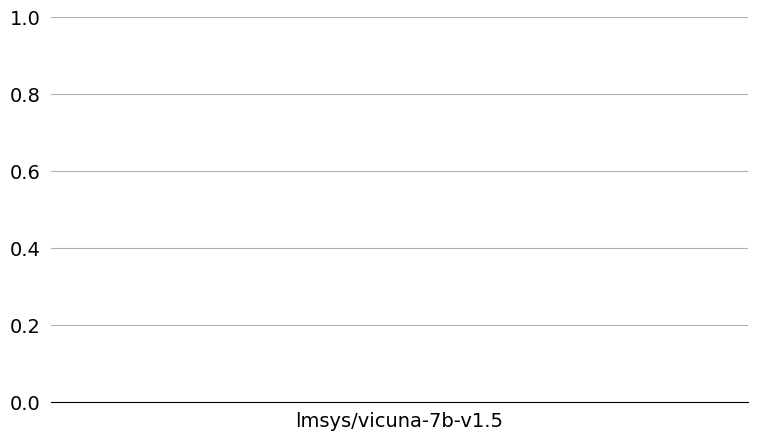

In [53]:
fig, ax = plt.subplots()
seaborn.barplot(
    x = 'model',
    y = df_plot['acc'],
    data =df_plot,
    yerr = df_plot['error'],
    ax = ax
)

In [45]:
df_plot

,model,acc,error,oid
0,lmsys/vicuna-7b-v1.5,0.328406,0.308593,0.338980
1,meta-llama/Llama-2-7b-chat-hf,0.424186,0.323170,0.367724
2,meta-llama/Llama-2-7b-hf,0.232933,0.246176,0.263423
3,meta-llama/Llama-2-13b-chat-hf,0.470400,0.285333,0.413733
4,meta-llama/Llama-2-13b-hf,0.304200,0.234400,0.293000
5,meta-llama/Meta-Llama-3-8B,0.344533,0.357733,0.275200
6,mistralai/Mistral-7B-Instruct-v0.2,0.444444,0.295111,0.389778
7,WizardLM/WizardLM-7B-V1.0,0.264667,0.000533,0.264800
8,gpt2,0.199774,0.072374,0.200595
